**Saksinkarn Petchkuljinda; 630510600**

## Idea of Polynomial Interpolation

Suppose we have $n+1$ datasets in the form of pairs $(x_0, y_0), ..., (x_n, y_n)$. We would like to find such the polynomial with minimum degree $p$ named $Q_p(x)$, such that:

$$Q_p(x_i) = y_i$$

For every $i\in\{0, ..., n\}$.

If $x_0, ..., x_n$ are distinct, then for any $f(x_0), ..., f(x_n)$ there **exists** a **unique** polynomial $Q_n(x)$ with sequence of coefficients $a_0, ..., a_n$ such that $Q_n(x_i) = y_i$ for all $i\in\{0, ..., n\}$, where:

$$
Q_n(x) = a_0+a_1x+a_2x^2+...+a_nx^n
$$

## Spline Interpolation

As seen in Lagrange and Newton Polynomials, they are unstable when interpolated to a large amount of data. Instead, **Spline Polynomials** can solve this problem. Instead of trying to fit the whole dataset into one polynomial, we split them into parts, and create each polynomial for each part instead. Simple as that.

**Formally speaking:** Let $s^k(x)$ be the spline polynomial of degree $k$ defined on data $(x_0, y_0), (x_1, y_1), ..., (x_{n-1}, y_{n-1})$. $s(x)$ contains polynomial of degree $k$ that are also differentiable at the ${k-1}^\text{th}$ order: $p_0(x), p_1(x), ..., p_{n-1} (x)$ such that:

$$
s^k(x) = 
\begin{cases}
p_0(x) &\text{if }x\in[x_0, x_1)\\
p_1(x) &\text{if }x\in[x_1, x_2)\\
...\\
p_{n-1}(x) &\text{if }x\in[x_{n-1}, x_n)
\end{cases}
$$

Since it is important that each separate polynomial should be connected smoothly, we may constrain them with **derivatives**, particularly those with higher degrees.

**We will only discuss about cubic splines, since they are the most commonly used ones you'd ever see in numerical analysis.**

Cubic spline consists of polynomials of the degree 3 for cubic spline interpolation.

Suppose we have the cubic polynomial, denoted as $p_i(x)$ and $p_{i+1}(x)$, in some spline interpolators such that

$$
\begin{align*}
p_i(x) &= a_ix^3 + b_ix^2 + c_ix + d_i&; x\in[t_i, t_{i+1})\\
p_{i+1}(x) &= a_{i+1}x^3 + b_{i+1}x^2 + c_{i+1}x + d_{i+1}&; x\in[t_{i+1}, t_{i+2})
\end{align*}
$$

We want such the polynomial to satisfy the following conditions:

$$
\begin{align*}
\text{(1)}\ \  & p\prime_i(t_{i+1}) = p\prime_{i+1}(t_{i+1})&;0\leq i \leq n-2\\
\text{(2)}\ \  & p\prime\prime_i(t_{i+1}) = p\prime\prime_{i+1}(t_{i+1})&;0\leq i \leq n-2
\end{align*}
$$

By using imagination, $p\prime\prime_i(x)$ and $p\prime\prime_{i+1}(x)$ are linear polynomials. ***Instead of explicitly calculating the second derivatives (unless we want our brain to be smashed), we can use Lagrange Polynomial to interpolate these two derivatives***

Let $z_i = p\prime\prime_i(t_i)$, then we can build a Lagrange polynomial to fit $(t_i, z_i)$ and $(t_{i+1}, z_{i+1})$, like so

$$
p\prime\prime_i = \frac{x-t_i}{h_i}z_{i+1} - \frac{x-t_{i+1}}{h_i}z_i
$$

where $h_i = t_{i+1} - t_i$

*We will not dive down into proving stuffs here, but it is still important to understand how it begins.*

Then, we use such the relation to find $p_i(x)$ and other polynomials that will become something like:

$$
p_i(x) =
\frac{z_{i+1}}{6h_i} (x-t_i)^3
+ \frac{z_i}{6h_i} (t_{i+1}-x)^3
+\Big(\frac{y_{i+1}}{h_i}-\frac{z_{i+1}h_i}{6} \Big)(x-t_i)
+\Big(\frac{y_i}{h_i}-\frac{z_ih_i}{6} \Big)(t_{i+1}-x)
$$

where $y_i$ and $y_{i+1}$ are the corresponding values to $y_i = f(x_i)$ and $y_{i+1} = f(x_{i+1})$, connecting the endpoints between $p_i(x)$ and $p_{i+1}(x)$.

Now $p_i(x)$ satisfy condition $\text{(2)}$. But what about condition $\text{(1)}$?

We use $p_i(x)$ above, to find $p_i\prime(x)$ and $p_{i+1}\prime(x)$ and so on, then let the derivatives equal $p_i\prime(x) = p_{i+1}\prime(x)$ at $x = t_i$, leading to a system of $n-1$ equations: to solve for $z_0, z_1, ..., z_n$.

We ignore $z_0$ and $z_n$ by just set them to $z_0=z_n=0$ (this is because there are no constants $h_{-1}, y_{-1}, h_{n+1}, y_{n+1}$ for that), then we solve for the rest with the following linear equation:

$$
\begin{align*}
\begin{bmatrix}
\frac{h_0 + h_1}{3} & \frac{h_1}{6} & 0 & 0 & ... & 0 & 0 & 0 \\
\frac{h_1}{6} & \frac{h_1 + h_2}{3} & \frac{h_2}{6} & 0 & ... & 0 & 0 & 0 \\
&...&...&&...&&...& \\
0 & 0 & 0 & 0 & ... & \frac{h_{n-3}}{6} & \frac{h_{n-3} + h_{n-2}}{3} & \frac{h_{n-2}}{6} \\
0 & 0 & 0 & 0 & ... & 0 & \frac{h_{n-2}}{6} &  \frac{h_{n-2} + h_{n-1}}{3}
\end{bmatrix}
\begin{bmatrix}
z_1 \\
z_2 \\
... \\
z_{n-2} \\
z_{n-1}
\end{bmatrix}
&=
\begin{bmatrix}
\frac{y_2-y_1}{h_1} - \frac{y_1-y_0}{h_0} \\
\frac{y_3-y_2}{h_2} - \frac{y_2-y_1}{h_1} \\
...\\
\frac{y_{n-1}-y_{n-2}}{h_{n-2}} - \frac{y_{n-2}-y_{n-3}}{h_{n-3}} \\
\frac{y_n-y_{n-1}}{h_{n-1}} - \frac{y_{n-1}-y_{n-2}}{h_{n-2}}
\end{bmatrix} \\
HZ &= Y
\end{align*}
$$

Then we solve for $Z$ with $Z=H^{-1}Y$ where $H^{-1}$ is the inverse matrix of $H$ (an inverse of any square matrix `X` can be computed using `inv(X)` in Julia). Then we can substitute $z_0, z_1, ..., z_n$ to each polynomial $p_0(x), p_1(x), ...$ to build the spline interpolators.

## Polynomial Implementation

There's actually a library called `Polynomials.jl`, but importing one here is messy. So let's stick to the same implementation from `interpolation-lagrange.ipynb`. You may run all and just scroll without reading them.

In [2]:
using Printf
using LaTeXStrings

Declare a class-like type for a polynomial.

In [3]:
Polynomial::Type{Dict{Int64, Float64}} = Dict{Int64, Float64}
# Dict of coefficient, followed by exponent

Dict{Int64, Float64}

Declare method-like functions for a polynomial.

In [4]:
function addToPolynomial!(
        poly::Polynomial,
        expo::Int64,
        coef::Float64,
    )::Nothing
    
    poly[expo] = get(poly, expo, 0.0) + coef
    
    # this code reduces calculation overhead from zero terms
    # iszero(x) is specifically made for floating-point numbers
    if iszero(poly[expo]) 
        delete!(poly, expo)
    end
    
    return nothing
end

addToPolynomial! (generic function with 1 method)

In [5]:
function addMultipleToPolynomial!(
        poly::Polynomial,
        monos::Union{Vector{Pair{Int64, Float64}}, Polynomial},
    )::Nothing
    for (expo, coef) in monos
        addToPolynomial!(poly, expo, coef)
    end
    return nothing
end

addMultipleToPolynomial! (generic function with 1 method)

In [6]:
function calcPoly(poly::Polynomial, x::Float64)::Float64
    ret::Float64 = 0.0
    for (expo, coef) in poly
        ret += coef * x ^ expo
    end
    return ret
end

calcPoly (generic function with 1 method)

In [7]:
function printRawPoly(poly::Polynomial)::String
    txt::String = ""
    for (i, expo) in enumerate(sort(collect(keys(poly)), rev=true))
        if i > 1 && poly[expo] >= 0
            txt = string(txt, "+")
        end
        txt = string(txt, "$(poly[expo])")
        if expo > 0
            txt = string(txt, "x")
        end
        if expo > 1
            txt = string(txt, "^$expo")
        end
    end
    return txt
end

printRawPoly (generic function with 1 method)

In [8]:
function printPoly(poly::Polynomial)::LaTeXString
    return LaTeXString("\$" * printRawPoly(poly) * "\$")
end

printPoly (generic function with 1 method)

In [9]:
# to pass a polynomial, use <poly> in the format string
function printFormattedPoly(
        txt::String,
        polies::Vararg{Polynomial},
    )::LaTeXString
    for poly in polies
        txt = replace(txt, "<poly>" => printRawPoly(poly), count=1)
    end
    return LaTeXString("\$" * txt * "\$")
end

printFormattedPoly (generic function with 1 method)

Test by building instances of the polynomial $P(x) = x^2 + 2x + 1$ in a variety of ways.

In [10]:
p1::Polynomial = Polynomial(Dict(2 => 1.0, 0 => 1.0, 1 => 2.0))
printFormattedPoly("p_1 = <poly>", p1)

L"$p_1 = 1.0x^2+2.0x+1.0$"

In [11]:
p2::Polynomial = Polynomial(Dict())
addToPolynomial!(p2, 2, 1.0)
addToPolynomial!(p2, 0, 1.0)
addToPolynomial!(p2, 1, 2.0)
printFormattedPoly("p_2 = <poly>", p2)

L"$p_2 = 1.0x^2+2.0x+1.0$"

In [12]:
p3::Polynomial = Polynomial(Dict())
addMultipleToPolynomial!(p3, [2 => 1.0, 0 => 1.0, 1 => 2.0])
printFormattedPoly("p_3 = <poly>", p3)

L"$p_3 = 1.0x^2+2.0x+1.0$"

In [13]:
LaTeXString("\$p_1(5) = $(calcPoly(p1, 5.0))\$")

L"$p_1(5) = 36.0$"

In [14]:
LaTeXString("\$p_2(5) = $(calcPoly(p2, 5.0))\$")

L"$p_2(5) = 36.0$"

In [15]:
LaTeXString("\$p_3(5) = $(calcPoly(p3, 5.0))\$")

L"$p_3(5) = 36.0$"

OK, it works! Now let's provide more operations over our Polynomial.

In [16]:
function polyPlus(p1::Polynomial, p2::Polynomial)::Polynomial
    ret::Polynomial = copy(p1)
    addMultipleToPolynomial!(ret, p2)
    
    return ret
end

function negPoly(poly::Polynomial)::Polynomial
    ret::Polynomial = copy(poly)
    for (expo, coef) in ret
        ret[expo] = -coef
    end
    
    return ret
end

function polyMinus(p1::Polynomial, p2::Polynomial)::Polynomial
    ret::Polynomial = copy(p1)
    neg_p2 = negPoly(p2)
    addMultipleToPolynomial!(ret, neg_p2)
    
    return ret
end

function polyMul(p1::Polynomial, p2::Polynomial)::Polynomial
    ret::Polynomial = Polynomial(Dict())
    for (expo1, coef1) in p1
        for (expo2, coef2) in p2
            addToPolynomial!(ret, expo1 + expo2, coef1 * coef2)
        end
    end
    
    return ret
end

polyMul (generic function with 1 method)

In [17]:
function mulConstToPoly(poly::Polynomial, c::Float64)::Polynomial
    # @printf("Before: ")
    # println(printPoly(poly))
    ret::Polynomial = copy(poly)
    for (expo, coef) in ret
        ret[expo] = c * coef
    end
    
    # @printf("After: ")
    # println(printPoly(ret))
    
    return ret
end

mulConstToPoly (generic function with 1 method)

Test

In [18]:
p1::Polynomial = Polynomial(Dict(2 => 1.0, 1 => -2.0, 0 => 1.0))
printFormattedPoly("p_1 = <poly>", p1)

L"$p_1 = 1.0x^2-2.0x+1.0$"

In [19]:
p2::Polynomial = Polynomial(Dict(1 => 1.0, 0 => -1.0))
printFormattedPoly("p_2 = <poly>", p2)

L"$p_2 = 1.0x-1.0$"

In [20]:
printFormattedPoly("p_1 + p_2 = <poly>", polyPlus(p1, p2))

L"$p_1 + p_2 = 1.0x^2-1.0x$"

In [21]:
printFormattedPoly("p_1 - p_2 = <poly>", polyMinus(p1, p2))

L"$p_1 - p_2 = 1.0x^2-3.0x+2.0$"

In [22]:
printFormattedPoly("p_1 \\cdot p_2 = <poly>", polyMul(p1, p2))

L"$p_1 \cdot p_2 = 1.0x^3-3.0x^2+3.0x-1.0$"

In [23]:
printFormattedPoly("c\\cdot p_1 = <poly>; c = 5", mulConstToPoly(p1, 5.0))

L"$c\cdot p_1 = 5.0x^2-10.0x+5.0; c = 5$"

## Implementation of SortedDict

In the purpose of this lab, types are fixed (not generalized).

In [24]:
struct SortedDict
    searchKeys::Set{Float64}
    dict::Dict{Float64, Float64}
    
    function SortedDict()
        new(Set(), Dict())
    end
    
    function SortedDict(olddict::Dict{Float64, Float64})
        newkeys = [k for k in collect(keys(olddict))]
        new(Set(newkeys), copy(olddict))
    end
    
    function SortedDict(pairs::Vararg{Pair{Float64, Float64}})
        newkeys = [k for (k, v) in pairs]
        new(Set(newkeys), Dict(pairs))
    end
end

In [25]:
import Base: getindex
import Base: setindex!

function getindex(sortedDict::SortedDict, index::Float64)::Float64
    return sortedDict.dict[index]
end

function setindex!(sortedDict::SortedDict, value::Float64, index::Float64)::Nothing
    if !(index in sortedDict.searchKeys)
        push!(sortedDict.searchKeys, index)
    end
    sortedDict.dict[index] = value
    return nothing
end

setindex! (generic function with 94 methods)

In [26]:
function lowerBoundHelper(
        sortedDict::SortedDict,
        index::Float64,
        lo::Int64,
        hi::Int64,
        keys::Vector{Float64},
    )::Float64
    
    mid::Int64 = (lo + hi) ÷ 2
    
    if index < keys[lo]
        # if index < sortedDict.keys[lo]
        #     println("index < lo")
        # elseif index > sortedDict.keys[hi]
        #     println("index > hi")
        # end
        return -Inf
    end
    
    if keys[mid] <= index
        # println("$(sortedDict.keys[mid]), index=$index")
        if mid < hi
            if keys[mid + 1] > index
                return keys[mid]
            else
                return lowerBoundHelper(sortedDict, index, mid == lo ? mid + 1 : mid, hi, keys)
            end
        else
            return keys[mid]
        end
    else
        # println("$(sortedDict.keys[mid]), index=$index")
        lowerBoundHelper(sortedDict, index, lo, mid, keys)
    end
end

function lowerBound(sortedDict::SortedDict, index::Float64)::Float64
    return lowerBoundHelper(
        sortedDict,
        index,
        1,
        length(sortedDict.dict),
        sort([k for k in sortedDict.searchKeys]),
    )
end

lowerBound (generic function with 1 method)

In [27]:
test = SortedDict(Dict(5.0 => 6.0, 7.0 => 4.0))

SortedDict(Set([5.0, 7.0]), Dict(5.0 => 6.0, 7.0 => 4.0))

In [28]:
test = SortedDict(5.0 => 6.0, 7.0 => 4.0, 4.0 => 3.0)

SortedDict(Set([5.0, 4.0, 7.0]), Dict(5.0 => 6.0, 4.0 => 3.0, 7.0 => 4.0))

In [29]:
test[5.0] = 9.0

9.0

In [30]:
test[7.0]

4.0

In [31]:
test[6.0] = 10.0
println(test.searchKeys)
println(test.dict)

Set([5.0, 4.0, 6.0, 7.0])


Dict(5.0 => 9.0, 4.0 => 3.0, 6.0 => 10.0, 7.0 => 4.0)


In [32]:
lowerBound(test, 8.0)

7.0

In [33]:
lowerBound(test, 4.0)

4.0

In [34]:
lowerBound(test, 6.0)

6.0

In [35]:
lowerBound(test, 3.9)

-Inf

In [36]:
function upperBoundHelper(
        sortedDict::SortedDict,
        index::Float64,
        lo::Int64,
        hi::Int64,
        keys=Vector{Float64},
    )::Float64
    
    mid::Int64 = (lo + hi) ÷ 2
    
    if index >= keys[hi]
        return Inf
    end
    
    if keys[mid] > index
        # println("$(sortedDict.keys[mid]), index=$index")
        if lo < mid
            if keys[mid - 1] <= index
                return keys[mid]
            else
                return upperBoundHelper(sortedDict, index, lo, mid, keys)
            end
        else
            return keys[mid]
        end
    else
        # println("$(sortedDict.keys[mid]), index=$index")
        upperBoundHelper(sortedDict, index, mid == lo ? mid + 1 : mid, hi, keys)
    end
end

function upperBound(sortedDict::SortedDict, index::Float64)::Float64
    return upperBoundHelper(sortedDict, index, 1, length(sortedDict.dict), sort([k for k in sortedDict.searchKeys]))
end

upperBound (generic function with 1 method)

In [37]:
upperBound(test, 8.0)

Inf

In [38]:
upperBound(test, 4.0)

5.0

In [39]:
upperBound(test, 6.0)

7.0

In [40]:
upperBound(test, 3.9)

4.0

## Implementation of Spline

In [41]:
struct Spline
    knot::SortedDict
    polies::Vector{Polynomial}
end

To fit any given $x$ to the spline, it will be generalized into this single function.

In [42]:
function calcSpline(spline::Spline, x::Float64)::Float64
    lower::Float64 = lowerBound(spline.knot, x)
    upper::Float64 = upperBound(spline.knot, x)
    
    # this is a flexible spline, we allow `x` to be lower than minimum,
    # and greater than maximum (for easier programming)
    if lower == -Inf
        return calcPoly(spline.polies[Int64(spline.knot[upper])], x)
    end
    return calcPoly(spline.polies[Int64(spline.knot[lower])], x)
end

calcSpline (generic function with 1 method)

### Spline of degree 0

What makes splines different is how they are built. Let's begin with spline of degree 0. For spline of degree 0 (constant interpolation) is simple, knowing where the points are, then assign them.

For spline of degree 0 (constant interpolation) is simple, knowing where the points are, then assign them.

In [43]:
function build1DSpline(data::Dict{Float64, Float64})::Spline
    Xs::Vector{Float64} = sort(collect(keys(data)))
    knot::SortedDict = SortedDict()
    polies::Vector{Polynomial} = Vector{Polynomial}()
    
    for (i, x) in enumerate(Xs)
        knot[x] = Float64(i)
        push!(polies, Polynomial(Dict(0 => data[x])))
    end
    
    return Spline(knot, polies)
end

build1DSpline (generic function with 1 method)

Suppose we want to fit the following data.

In [44]:
mySample::Dict{Float64, Float64} = Dict(
    0.0 => -2.0,
    1.0 => 2.0,
    2.0 => -1.0,
    3.0 => 1.0,
    4.0 => 0.0,
)

Dict{Float64, Float64} with 5 entries:
  0.0 => -2.0
  4.0 => 0.0
  2.0 => -1.0
  3.0 => 1.0
  1.0 => 2.0

Let's see the result

In [45]:
my1DSpline = build1DSpline(mySample)

Spline(SortedDict(Set([0.0, 4.0, 2.0, 3.0, 1.0]), Dict(0.0 => 1.0, 4.0 => 5.0, 2.0 => 3.0, 3.0 => 4.0, 1.0 => 2.0)), [Dict(0 => -2.0), Dict(0 => 2.0), Dict(0 => -1.0), Dict(0 => 1.0), Dict(0 => 0.0)])

In [46]:
using Plots

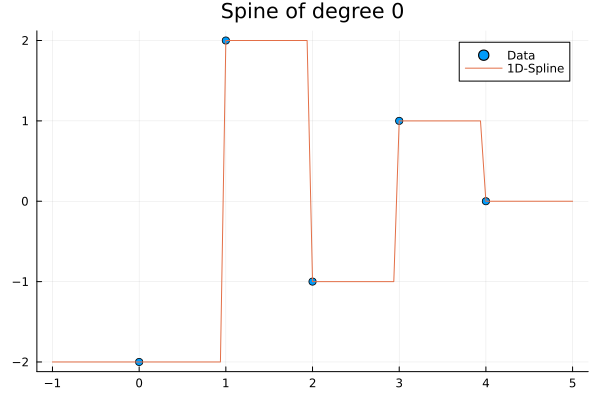

In [47]:
Xreal = collect(keys(mySample))
Yreal = [mySample[x] for x in Xreal]

Xhat = -1.0:0.0625:5.0
Yhat = [calcSpline(my1DSpline, x) for x in Xhat]

scatter(Xreal, Yreal, title="Spine of degree 0", label="Data")
plot!(Xhat, Yhat, label="1D-Spline")

### Spline of degree 1

is considered Linear spline. Since we cannot find the $0^\text{th}$ order derivative, we don't have to.

In [48]:
function build2DSpline(data::Dict{Float64, Float64})::Spline
    Xs::Vector{Float64} = sort(collect(keys(data)))
    knot::SortedDict = SortedDict()
    polies::Vector{Polynomial} = Vector{Polynomial}()
    
    for (i, x) in enumerate(Xs[1:end-1])
        knot[x] = Float64(i)
        m = (data[Xs[i+1]] - data[x]) / (Xs[i+1] - x)
        push!(polies, Polynomial(Dict(1 => m, 0 => data[x] - m * x)))
    end
    
    return Spline(knot, polies)
end

build2DSpline (generic function with 1 method)

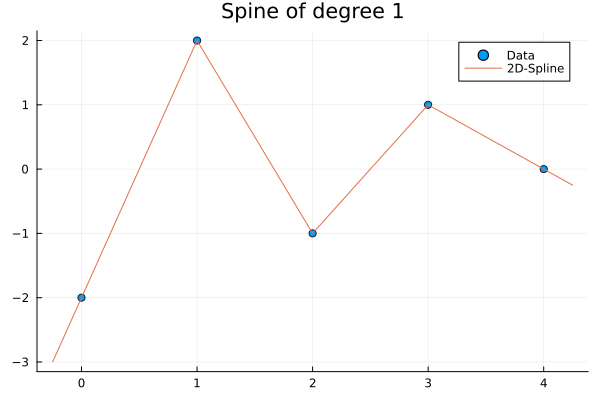

In [49]:
my2DSpline = build2DSpline(mySample)

Xreal = collect(keys(mySample))
Yreal = [mySample[x] for x in Xreal]

Xhat = -0.25:0.0625:4.25
Yhat = [calcSpline(my2DSpline, x) for x in Xhat]

scatter(Xreal, Yreal, title="Spine of degree 1", label="Data")
plot!(Xhat, Yhat, label="2D-Spline")

### Cubic Spline

Here comes the fun part, as we have so.... many things to do here.

First, define a function to calculate the matrix $Z$, which derived from:

We ignore $z_0$ and $z_n$ by just set them to $z_0=z_n=0$ (this is because there are no constants $h_{-1}, y_{-1}, h_{n+1}, y_{n+1}$ for that), then we solve for the rest with the following linear equation:

$$
\begin{align*}
\begin{bmatrix}
\frac{h_0 + h_1}{3} & \frac{h_1}{6} & 0 & 0 & ... & 0 & 0 & 0 \\
\frac{h_1}{6} & \frac{h_1 + h_2}{3} & \frac{h_2}{6} & 0 & ... & 0 & 0 & 0 \\
&...&...&&...&&...& \\
0 & 0 & 0 & 0 & ... & \frac{h_{n-3}}{6} & \frac{h_{n-3} + h_{n-2}}{3} & \frac{h_{n-2}}{6} \\
0 & 0 & 0 & 0 & ... & 0 & \frac{h_{n-2}}{6} &  \frac{h_{n-2} + h_{n-1}}{3}
\end{bmatrix}
\begin{bmatrix}
z_1 \\
z_2 \\
... \\
z_{n-2} \\
z_{n-1}
\end{bmatrix}
&=
\begin{bmatrix}
\frac{y_2-y_1}{h_1} - \frac{y_1-y_0}{h_0} \\
\frac{y_3-y_2}{h_2} - \frac{y_2-y_1}{h_1} \\
...\\
\frac{y_{n-1}-y_{n-2}}{h_{n-2}} - \frac{y_{n-2}-y_{n-3}}{h_{n-3}} \\
\frac{y_n-y_{n-1}}{h_{n-1}} - \frac{y_{n-1}-y_{n-2}}{h_{n-2}}
\end{bmatrix} \\
HZ &= Y \\
H^{-1} HZ &= H^{-1} Y \\
Z &= H^{-1} Y
\end{align*}
$$

In [51]:
function calculateZ(
        data::Dict{Float64, Float64},
        n::Int64,
        Xs::Vector{Float64},
    )::Vector{Float64}
    
    # bulid matrices H and Y first
    H::Matrix{Float64} = zeros(Float64, n - 2, n - 2)
    Y::Matrix{Float64} = zeros(Float64, n - 2, 1)
    
    for i in 1:n-2
        if i > 1
            H[i, i - 1] = (Xs[i] - Xs[i - 1]) / 6.0
        end
        if i < n - 2
            H[i, i + 1] = (Xs[i + 2] - Xs[i + 1]) / 6.0
        end
        H[i, i] = (Xs[i + 2] - Xs[i]) / 3.0
        Y[i, 1] = (data[Xs[i+2]] - data[Xs[i+1]]) / (Xs[i+2] - Xs[i+1]) - (data[Xs[i+1]] - data[Xs[i]]) / (Xs[i+1] - Xs[i])
    end
    
    # calculate Z
    Z = inv(H) * Y
    
    # flatten Z to a 1D vector
    Z = vec(Z)
    
    return Z
end

calculateZ (generic function with 1 method)

Then we build each polynomial $p_i(x)$ such that:

$$
p_i(x) =
\frac{z_{i+1}}{6h_i} (x-t_i)^3
+ \frac{z_i}{6h_i} (t_{i+1}-x)^3
+\Big(\frac{y_{i+1}}{h_i}-\frac{z_{i+1}h_i}{6} \Big)(x-t_i)
+\Big(\frac{y_i}{h_i}-\frac{z_ih_i}{6} \Big)(t_{i+1}-x)
$$

In [52]:
function buildCubicSpline(data::Dict{Float64, Float64})::Spline
    n::Int64 = length(data)
    Xs::Vector{Float64} = sort(collect(keys(data)))
    
    # calculate Z
    Z::Vector{Float64} = calculateZ(data, n, Xs)
    
    # push 0 to the first and the last of the vector Z
    pushfirst!(Z, 0.0)
    push!(Z, 0.0)
    
    knot::SortedDict = SortedDict()
    polies::Vector{Polynomial} = Vector{Polynomial}()
    
    for (i, x) in enumerate(Xs[1:end-1])
        xti::Polynomial = Polynomial(Dict(1 => 1, 0 => -x))
        xt1i::Polynomial = Polynomial(Dict(1 => -1, 0 => Xs[i+1]))
        xti_3::Polynomial = polyMul(polyMul(xti, xti), xti)
        xt1i_3::Polynomial = polyMul(polyMul(xt1i, xt1i), xt1i)
        
        pix_1 = mulConstToPoly(xti_3, Z[i+1] / 6.0 / (Xs[i+1] - Xs[i]))
        pix_2 = mulConstToPoly(xt1i_3, Z[i] / 6.0 / (Xs[i+1] - Xs[i]))
        pix_3 = mulConstToPoly(xti, data[Xs[i+1]] / (Xs[i+1] - Xs[i]) - Z[i + 1] * (Xs[i+1] - Xs[i]) / 6.0)
        pix_4 = mulConstToPoly(xt1i, data[Xs[i]] / (Xs[i+1] - Xs[i]) - Z[i] * (Xs[i+1] - Xs[i]) / 6.0)
        
        knot[x] = Float64(i)
        push!(
            polies,
            polyPlus(polyPlus(pix_1, pix_2), polyPlus(pix_3, pix_4)),
        )
    end
    
    return Spline(knot, polies)
end

buildCubicSpline (generic function with 1 method)

Test

In [53]:
myCubSpline = buildCubicSpline(mySample)

Spline(SortedDict(Set([0.0, 2.0, 3.0, 1.0]), Dict(0.0 => 1.0, 2.0 => 3.0, 3.0 => 4.0, 1.0 => 2.0)), [Dict(0 => -2.0, 3 => -2.2857142857142856, 1 => 6.285714285714286), Dict(0 => -8.714285714285712, 2 => -20.142857142857142, 3 => 4.428571428571429, 1 => 26.428571428571423), Dict(0 => 54.14285714285715, 2 => 27.000000000000004, 3 => -3.428571428571429, 1 => -67.85714285714288), Dict(0 => -73.14285714285715, 2 => -15.42857142857143, 3 => 1.2857142857142858, 1 => 59.42857142857144)])

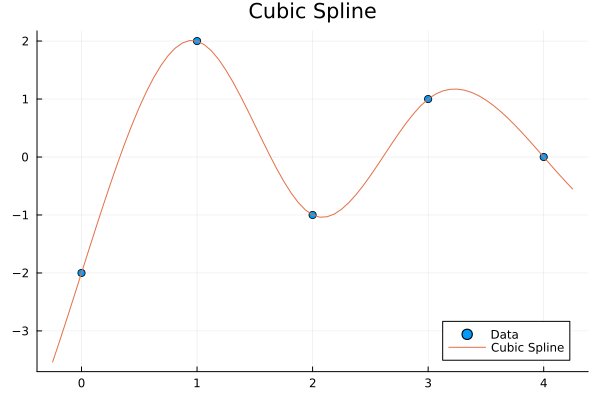

In [54]:
Xreal = collect(keys(mySample))
Yreal = [mySample[x] for x in Xreal]

Xhat = -0.25:0.0625:4.25
Yhat = [calcSpline(myCubSpline, x) for x in Xhat]

scatter(Xreal, Yreal, title="Cubic Spline", label="Data")
plot!(Xhat, Yhat, label="Cubic Spline")

## Import Lagrange for comparison

From the previous notebook `interpolation-newton.ipynb`, the result shows that Newton and Lagrange technically give identical polynomials. Therefore, we will only use Lagrange here as it is much easier to implement (at least for my code)

In [55]:
function L(Xs::Vector{Float64}, j::Int64)::Polynomial
    xj::Float64 = Xs[j]
    ret::Polynomial = Polynomial(Dict(0 => 1.0))  # initial P(x) = 1x^0 = 1
    denom::Float64 = 1.0
    
    # println("Building L$j: x_%j = $xj")
    
    for (i, x) in enumerate(Xs)
        if i == j
            continue
        end
        
        current::Polynomial = Polynomial(Dict(1 => 1.0, 0 => -x))
        ret = polyMul(ret, current)
        denom::Float64 *= xj - x
    end
    
    ret = mulConstToPoly(ret, 1.0/denom)
    # println(printPoly(ret))
    return ret
end

L (generic function with 1 method)

In [56]:
function buildLagrange(data::Dict{Float64, Float64})::Polynomial  # takes pairs of (x, y) where x must be distinct
    Xs::Vector{Float64} = sort(collect(keys(data)))
    ret::Polynomial = Polynomial(Dict())
    for (i, x) in enumerate(Xs)
        l::Polynomial = L(Xs, i)
        term::Polynomial = mulConstToPoly(l, data[x])
        # println("data[$x] = $(data[x])")
        # println("multiplied term: $(printPoly(term))")
        ret = polyPlus(ret, term)
    end
    
    return ret
end

buildLagrange (generic function with 1 method)

## Test on complex data

We will try to interpolate $f(x) = \mathrm{sin}(x\cdot \mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(x)))))))))$ to see what would happen.

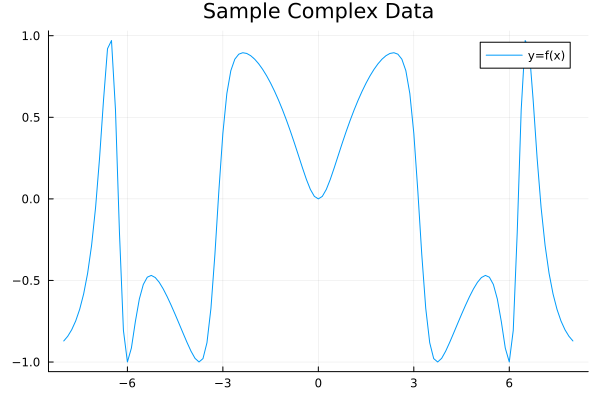

In [57]:
Xs = -8.0:0.125:8.0
f = x -> sin(x * sin(sin(sin(sin(sin(sin(sin(sin(x)))))))))
Yreal = [f(x) for x in Xs]

plot(Xs, Yreal, title="Sample Complex Data", label="y=f(x)")

Fit a cubic spline over $x\in[-8, 8]$ with $x$ increases every $2$ steps.

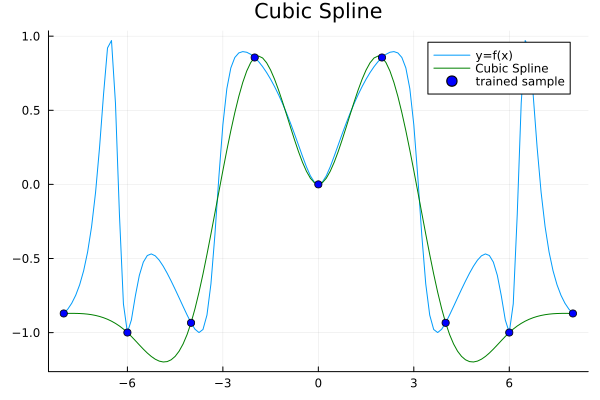

In [58]:
Xlag = -8.0:2.0:8.0
cubic = buildCubicSpline(Dict(x => f(x) for x in Xlag))

Ycub = [calcSpline(cubic, x) for x in Xs]

plot(Xs, Yreal, title="Cubic Spline", label="y=f(x)")
plot!(Xs, Ycub, color="green", label="Cubic Spline")
scatter!(Xlag, [f(x) for x in Xlag], color="blue", label="trained sample")

Compared to Lagrange.

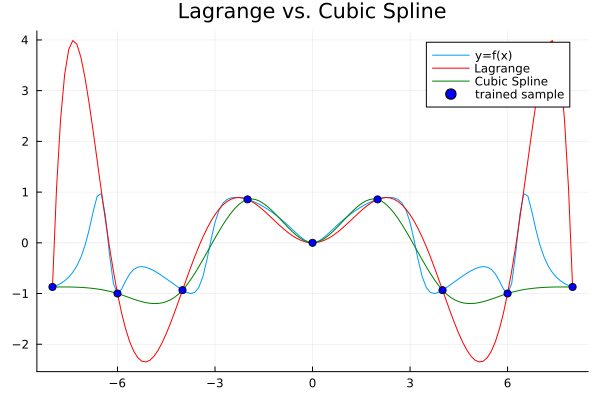

In [59]:
Xlag = -8.0:2.0:8.0
lagrange = buildLagrange(Dict(x => f(x) for x in Xlag))
cubic = buildCubicSpline(Dict(x => f(x) for x in Xlag))

Ylag = [calcPoly(lagrange, x) for x in Xs]
Ycub = [calcSpline(cubic, x) for x in Xs]

plot(Xs, Yreal, title="Lagrange vs. Cubic Spline", label="y=f(x)")
plot!(Xs, Ylag, color="red", label="Lagrange")
plot!(Xs, Ycub, color="green", label="Cubic Spline")
scatter!(Xlag, [f(x) for x in Xlag], color="blue", label="trained sample")

Fit a cubic spline over $x\in[-8, 8]$ with $x$ increases every $1$ steps.

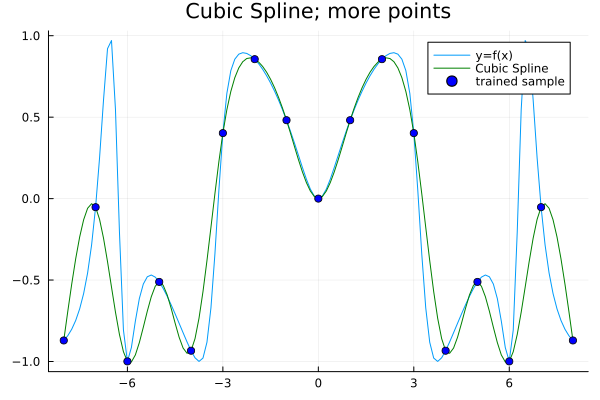

In [60]:
Xlag = -8.0:1.0:8.0
cubic = buildCubicSpline(Dict(x => f(x) for x in Xlag))

Ycub = [calcSpline(cubic, x) for x in Xs]

plot(Xs, Yreal, title="Cubic Spline; more points", label="y=f(x)")
plot!(Xs, Ycub, color="green", label="Cubic Spline")
scatter!(Xlag, [f(x) for x in Xlag], color="blue", label="trained sample")

Compared to Lagrange.

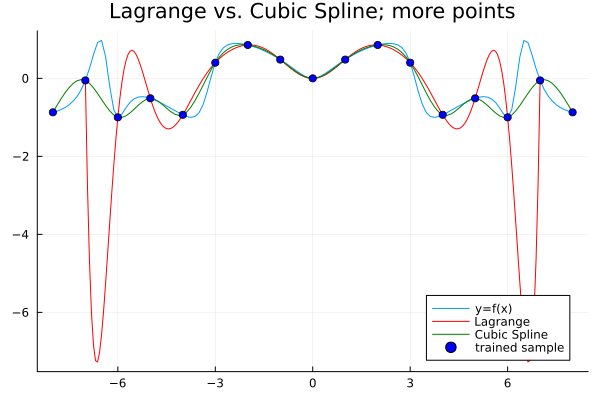

In [61]:
Xlag = -8.0:1.0:8.0
Xshow = -7.0:0.0625:7.0
lagrange = buildLagrange(Dict(x => f(x) for x in Xlag))
cubic = buildCubicSpline(Dict(x => f(x) for x in Xlag))

Ylag = [calcPoly(lagrange, x) for x in Xshow]
Ycub = [calcSpline(cubic, x) for x in Xs]

plot(Xs, Yreal, title="Lagrange vs. Cubic Spline; more points", label="y=f(x)")
plot!(Xshow, Ylag, color="red", label="Lagrange")
plot!(Xs, Ycub, color="green", label="Cubic Spline")
scatter!(Xlag, [f(x) for x in Xlag], color="blue", label="trained sample")

Though both Lagrange and Cubic Spline are imperfect, **cubic spline shows to be more accurate than Lagrange polynomials (and technically, more accurate than Newton polynomials)**.